# Análise do COVID-19
## Laboratório de estudos de casos do Corona Virus Covid-19

## Fonte de Dados
Base de dados da Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) <br>
Com base nele foi publicado o estudo: <br>

### *An interactive web-based dashboard to track COVID-19 in real time* <br>
DOI:  https://doi.org/10.1016/S1473-3099(20)30120-1 <br>
Painel: https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Dentre os dados vamos utilizar o "CSSE COVID-19 Dataset" que é atualizado diariamente.<br>
Nele há duas bases de dados
<ul>"Daily Reports"</ul>
<ul>"Time Series"</ul>

Vamos utilizar o Time Series.<br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importando Dados

In [2]:
dfWorld = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [3]:
dfWorld.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [4]:
# Visualizar ultimos 4 elementos:
dfWorld.tail(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
483,NaN,Grenada,12.1165,-61.6790,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,-18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
486,NaN,Timor-Leste,-8.8742,125.7275,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Análise:
#### Temos Lat/Long, Country/Region e DateTime
Ou seja, podemos fazer um plot por países, localização/distâncias e por séries temporais
ou mesmo, qualquer junção dessas dimensões

In [5]:
# dfWorld.describe
# Describe é muito extenso
# selecioando apenas colunas de data
# qtd = dfWorld.shape[1]

### Dados do Mundo Todo

In [6]:
# convertendo para séries temporais:
tsWorld = np.sum(dfWorld.iloc[ : , 4 : ])
tsWorld.index = pd.DatetimeIndex(tsWorld.index)
tsWorld.tail(3)

2020-03-20    272166
2020-03-21    304524
2020-03-22    335955
dtype: int64

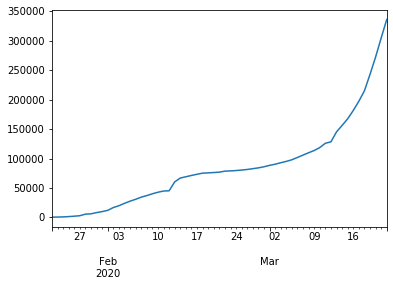

In [7]:
tsWorld.plot()

### Análise do Brasil

In [8]:
dfBr = dfWorld[dfWorld['Country/Region'] == 'Brazil']

In [9]:
dfBr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
35,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,151,151,162,200,321,372,621,793,1021,1593


In [10]:
dfBr.drop(['Province/State','Lat','Long'], axis=1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
35,Brazil,0,0,0,0,0,0,0,0,0,...,151,151,162,200,321,372,621,793,1021,1593


In [11]:
# qtdBr = dfBr.shape[1]
# qtdBr

In [12]:
# Gerando a TimeSeries
tsBr = np.sum(dfBr.iloc[ : , 4 :  ])

In [13]:
tsBr

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
3/18/20     372
3/19/20     621
3/20/20     793
3/21/20    1021
3/22/20    1593
Length: 61, dtype: int64

In [14]:
tsBr.index = pd.DatetimeIndex(tsBr.index)

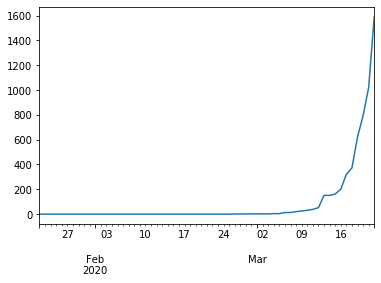

In [15]:
# Comparando os dados:
# plt.plot(index=tsBr.index)
# plt.plot(index=tsWorld.index)
# plt.show
tsBr.plot()

### Comparando Brasil com outros Países

In [16]:
dfUs = dfWorld[dfWorld['Country/Region'] == 'US']
dfCh = dfWorld[dfWorld['Country/Region'] == 'China']
dfIt = dfWorld[dfWorld['Country/Region'] == 'Italy']

In [17]:
dfUs.drop(['Province/State','Lat','Long'], axis=1)
dfCh.drop(['Province/State','Lat','Long'], axis=1)
dfIt.drop(['Province/State','Lat','Long'], axis=1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
16,Italy,0,0,0,0,0,0,0,0,0,...,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138


In [18]:
# Gerando a TimeSeries
tsUs = np.sum(dfUs.iloc[ : , 4 :  ])
tsCh = np.sum(dfCh.iloc[ : , 4 :  ])
tsIt = np.sum(dfIt.iloc[ : , 4 :  ])

tsUs.index = pd.DatetimeIndex(tsUs.index)
tsCh.index = pd.DatetimeIndex(tsCh.index)
tsIt.index = pd.DatetimeIndex(tsIt.index)

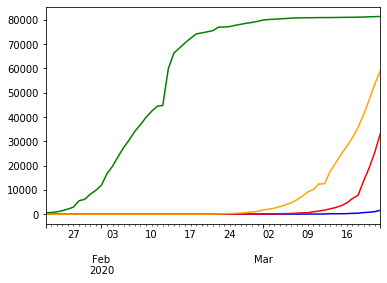

In [19]:
ax = plt.gca()


tsBr.plot(kind='line',x='Data',y='Qtd', color='Blue', ax=ax)
tsUs.plot(kind='line',x='Data',y='Qtd', color='Red', ax=ax)
tsCh.plot(kind='line',x='Data',y='Qtd', color='Green', ax=ax)
tsIt.plot(kind='line',x='Data',y='Qtd', color='Orange', ax=ax)

plt.show()